# Import Libraries

In [43]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler

# Load Dataset

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/eda-and-imdb-rating-prediction/main/imdb%20processed.csv')

In [45]:
data.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,...,0,1,0,0,0,0,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,...,0,0,0,0,0,0,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,...,0,1,0,0,0,0,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           9439 non-null   object 
 1   title                            9439 non-null   object 
 2   year                             9439 non-null   int64  
 3   rate                             9439 non-null   float64
 4   votes                            9439 non-null   int64  
 5   genre                            9439 non-null   object 
 6   certificate                      9439 non-null   object 
 7   duration                         9439 non-null   int64  
 8   nudity                           9439 non-null   object 
 9   violence                         9439 non-null   object 
 10  profanity                        9439 non-null   object 
 11  alcohol                          9439 non-null   object 
 12  frightening         

In [47]:
list_genre = ['Action', 'Adult', 'Adventure', 'Animation',
    'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'History',
    'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

tabel = []

for i in list_genre:
    a = []
    x = data['title'][(data['is_'+i] == 1)].count()
    a.append(i)
    a.append(x)
    tabel.append(a)

# Dataframe Genre

In [48]:
df = pd.DataFrame(tabel, columns =['Genre', 'Total'])
df = df.sort_values('Total', ascending=False)

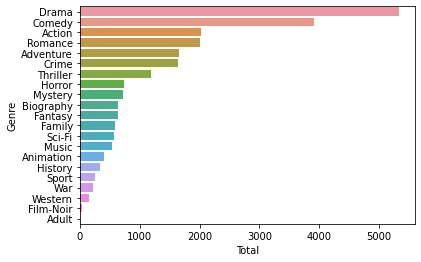

In [49]:
sns.barplot(data = df,
            y = 'Genre',
            x = 'Total'
            )
plt.show()

In [50]:
df['percentage'] = df['Total']/data.shape[0]*100
df.head(10)

,Genre,Total,percentage
7,Drama,5334,56.510224
5,Comedy,3919,41.519229
0,Action,2023,21.432355
15,Romance,2007,21.262846
2,Adventure,1649,17.470071
6,Crime,1639,17.364128
18,Thriller,1194,12.649645
11,Horror,737,7.808031
14,Mystery,716,7.585549
4,Biography,637,6.748596


# Maximum Budget, Gross, and Profit

In [51]:
data_budget = data.sort_values('budget', ascending=False).head(10).reset_index(drop=True)

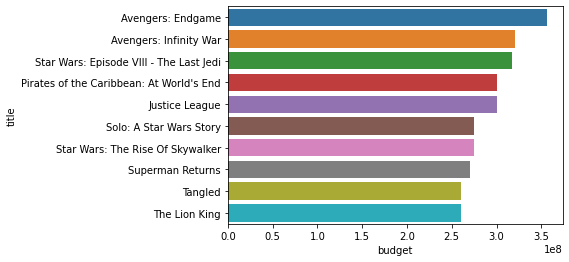

In [52]:
sns.barplot(data = data_budget,
            x = 'budget',
            y = 'title'
            )
plt.show()

In [53]:
max_budget = data_budget.sort_values('budget', ascending=False).head(1)
max_budget

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4
0,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth


In [54]:
data_gross = data.sort_values('worldwide_gross', ascending=False).head(10).reset_index(drop=True)

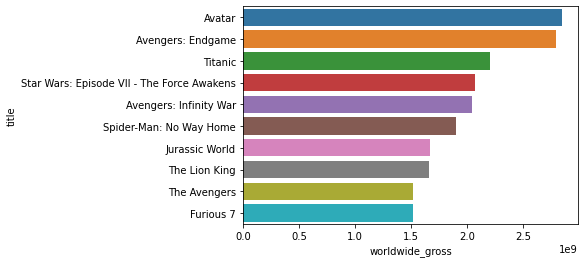

In [55]:
sns.barplot(data = data_gross,
            x = 'worldwide_gross',
            y = 'title'
            )
plt.show()

In [56]:
max_gross = data_gross.sort_values('worldwide_gross', ascending=False).head(1)
max_gross

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4
0,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez


In [57]:
data_profit = data.copy()
data_profit['profit'] = data_profit['worldwide_gross'] - data_profit['budget']
data_profit = data_profit.sort_values('profit', ascending=False).head(10).reset_index(drop=True)

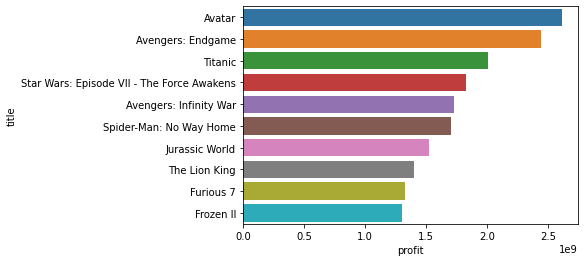

In [58]:
sns.barplot(data = data_profit,
            x = 'profit',
            y = 'title'
            )
plt.show()

In [59]:
max_profit = data_profit.sort_values('profit', ascending=False).head(1)
max_profit

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4,profit
0,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,2.610397e+09


# Hypothesis Testing

In [60]:
alpha = 0.05
none = data[data['violence']=='None']
mild = data[data['violence']=='Mild']
moderate = data[data['violence']=='Moderate']
severe = data[data['violence']=='Severe']

anova_result=stat.f_oneway(none['rate'],mild['rate'],moderate['rate'],severe['rate'])
p_value = anova_result.pvalue
print('p_value : '+ str(p_value))
if p_value > alpha:
  print('violence' + ' has no effect on movie rate')
else:
  print('violence' +' has effect on movie rate')


p_value : 8.75580419066415e-05
violence has effect on movie rate


# Machine Learning

## Preparation and Encoding

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9439 entries, 0 to 9438
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url_id                           9439 non-null   object 
 1   title                            9439 non-null   object 
 2   year                             9439 non-null   int64  
 3   rate                             9439 non-null   float64
 4   votes                            9439 non-null   int64  
 5   genre                            9439 non-null   object 
 6   certificate                      9439 non-null   object 
 7   duration                         9439 non-null   int64  
 8   nudity                           9439 non-null   object 
 9   violence                         9439 non-null   object 
 10  profanity                        9439 non-null   object 
 11  alcohol                          9439 non-null   object 
 12  frightening         

In [62]:
data.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Romance,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,...,0,1,0,0,0,0,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,...,0,0,0,0,0,0,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,...,0,1,0,0,0,0,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira


In [63]:
df.head(10)

,Genre,Total,percentage
7,Drama,5334,56.510224
5,Comedy,3919,41.519229
0,Action,2023,21.432355
15,Romance,2007,21.262846
2,Adventure,1649,17.470071
6,Crime,1639,17.364128
18,Thriller,1194,12.649645
11,Horror,737,7.808031
14,Mystery,716,7.585549
4,Biography,637,6.748596


In [64]:
most_genre = ['Drama', 'Comedy', 'Action', 'Romance', 'Adventure', 'Crime', 'Thriller']
less_genre = list(set(list_genre) - set(most_genre))

a = []
for i in less_genre:
  a.append('is_'+i)

In [65]:
data['less_genre'] = data[a].sum(axis=1)
data.head()

,url_id,title,year,rate,votes,genre,certificate,duration,nudity,violence,...,is_Sci-Fi,is_Sport,is_Thriller,is_War,is_Western,star1,star2,star3,star4,less_genre
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,7.8,918325,"Action, Adventure, Sci-Fi",PG-13,138,None,Moderate,...,1,0,0,0,0,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,1
1,tt4154796,Avengers: Endgame,2019,8.4,1082885,"Action, Adventure, Drama",PG-13,181,None,Moderate,...,0,0,0,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,0
2,tt10872600,Spider-Man: No Way Home,2021,8.3,694209,"Action, Adventure, Fantasy",PG-13,148,None,Moderate,...,0,0,0,0,0,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,1
3,tt0499549,Avatar,2009,7.8,1214008,"Action, Adventure, Fantasy",PG-13,162,Mild,Moderate,...,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1
4,tt1825683,Black Panther,2018,7.3,736095,"Action, Adventure, Sci-Fi",PG-13,134,None,Moderate,...,1,0,0,0,0,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira,1


In [66]:
data['is_Other'] = np.where(data['less_genre'] == 0, 0, 1)

In [67]:
data.drop('url_id', inplace=True, axis=1)
data.drop('title', inplace=True, axis=1)
data.drop('year', inplace=True, axis=1)
data.drop('rate', inplace=True, axis=1)
data.drop('votes', inplace=True, axis=1)
data.drop('certificate', inplace=True, axis=1)
data.drop('director', inplace=True, axis=1)
data.drop('star', inplace=True, axis=1)
data.drop('total_nominations', inplace=True, axis=1)
data.drop('total_wins', inplace=True, axis=1)
data.drop('oscar_nominations', inplace=True, axis=1)
data.drop('oscar_wins', inplace=True, axis=1)
data.drop('gross_us_canada', inplace=True, axis=1)
data.drop('opening_weekend_gross_us_canada', inplace=True, axis=1)
data.drop('aspect_ratio', inplace=True, axis=1)
data.drop('color', inplace=True, axis=1)
data.drop('url_image', inplace=True, axis=1)
data.drop('plot', inplace=True, axis=1)
data.drop(['is_Biography', 'is_Music', 'is_Western', 'is_Horror', 'is_Adult', 'is_History', 'is_Sport', 'is_War', 'is_Animation', 'is_Mystery', 'is_Sci-Fi', 'is_Family', 'is_Film-Noir', 'is_Fantasy'], inplace=True, axis=1)
data.drop('less_genre', inplace=True, axis=1)
data.drop('genre', inplace=True, axis=1)

data.head()

,duration,nudity,violence,profanity,alcohol,frightening,budget,worldwide_gross,is_Action,is_Adventure,is_Comedy,is_Crime,is_Drama,is_Romance,is_Thriller,star1,star2,star3,star4,is_Other
0,138,None,Moderate,Mild,None,Moderate,245000000.0,2.069522e+09,1,1,0,0,0,0,0,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,1
1,181,None,Moderate,Mild,Mild,Moderate,356000000.0,2.797501e+09,1,1,0,0,1,0,0,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,0
2,148,None,Moderate,Mild,None,Moderate,200000000.0,1.901233e+09,1,1,0,0,0,0,0,Tom Holland,Zendaya,Benedict Cumberbatch,Jacob Batalon,1
3,162,Mild,Moderate,Moderate,Mild,Moderate,237000000.0,2.847397e+09,1,1,0,0,0,0,0,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1
4,134,None,Moderate,Mild,None,Moderate,200000000.0,1.347598e+09,1,1,0,0,0,0,0,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira,1


In [68]:
data = data.dropna().reset_index(drop=True)

cols = ['nudity', 'violence', 'profanity', 'alcohol', 'frightening']
data[cols] = data[cols].replace({'None':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'No Rate':0})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6325 entries, 0 to 6324
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   duration         6325 non-null   int64  
 1   nudity           6325 non-null   int64  
 2   violence         6325 non-null   int64  
 3   profanity        6325 non-null   int64  
 4   alcohol          6325 non-null   int64  
 5   frightening      6325 non-null   int64  
 6   budget           6325 non-null   float64
 7   worldwide_gross  6325 non-null   float64
 8   is_Action        6325 non-null   int64  
 9   is_Adventure     6325 non-null   int64  
 10  is_Comedy        6325 non-null   int64  
 11  is_Crime         6325 non-null   int64  
 12  is_Drama         6325 non-null   int64  
 13  is_Romance       6325 non-null   int64  
 14  is_Thriller      6325 non-null   int64  
 15  star1            6325 non-null   object 
 16  star2            6325 non-null   object 
 17  star3         

In [69]:
actor = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/eda-and-imdb-rating-prediction/main/actor%20rank.csv', sep='\t')
actor['actor'] = actor['actor'].str.lower()
actor.head()

,rank_actor,actor,box_office_actor,movies_actor,average_actor
0,1,stan lee,"30,606,129,162",49,"624,614,881"
1,2,samuel l. jackson,"27,703,132,819",139,"199,303,114"
2,3,frank welker,"17,443,260,126",112,"155,743,394"
3,4,john ratzenberger,"16,769,039,846",52,"322,481,536"
4,5,robert downey jr.,"15,728,895,535",67,"234,759,635"


In [70]:
data['star1'] = data['star1'].str.strip()
data['star2'] = data['star2'].str.strip()
data['star3'] = data['star3'].str.strip()
data['star4'] = data['star4'].str.strip()

data['star1'] = data['star1'].str.lower()
data['star2'] = data['star2'].str.lower()
data['star3'] = data['star3'].str.lower()
data['star4'] = data['star4'].str.lower()

In [71]:
data['score1'] = data.star1.map(actor.set_index('actor')['rank_actor'])
data['score2'] = data.star2.map(actor.set_index('actor')['rank_actor'])
data['score3'] = data.star3.map(actor.set_index('actor')['rank_actor'])
data['score4'] = data.star4.map(actor.set_index('actor')['rank_actor'])
data['score1'] = data['score1'].fillna(1000)
data['score2'] = data['score2'].fillna(1000)
data['score3'] = data['score3'].fillna(1000)
data['score4'] = data['score4'].fillna(1000)

data['total_star_score'] = data[['score1','score2','score3','score4']].sum(axis=1)

data.head()

,duration,nudity,violence,profanity,alcohol,frightening,budget,worldwide_gross,is_Action,is_Adventure,...,star1,star2,star3,star4,is_Other,score1,score2,score3,score4,total_star_score
0,138,0,2,1,0,2,245000000.0,2.069522e+09,1,1,...,daisy ridley,john boyega,oscar isaac,domhnall gleeson,1,271.0,319.0,134.0,85.0,809.0
1,181,0,2,1,1,2,356000000.0,2.797501e+09,1,1,...,robert downey jr.,chris evans,mark ruffalo,chris hemsworth,0,5.0,13.0,31.0,20.0,69.0
2,148,0,2,1,0,2,200000000.0,1.901233e+09,1,1,...,tom holland,zendaya,benedict cumberbatch,jacob batalon,1,33.0,296.0,9.0,73.0,411.0
3,162,1,2,2,1,2,237000000.0,2.847397e+09,1,1,...,sam worthington,zoe saldana,sigourney weaver,michelle rodriguez,1,338.0,21.0,101.0,53.0,513.0
4,134,0,2,1,0,2,200000000.0,1.347598e+09,1,1,...,chadwick boseman,michael b. jordan,lupita nyong'o,danai gurira,1,109.0,1000.0,125.0,200.0,1434.0


In [72]:
data.drop('star1', inplace=True, axis=1)
data.drop('star2', inplace=True, axis=1)
data.drop('star3', inplace=True, axis=1)
data.drop('star4', inplace=True, axis=1)
data.drop('score1', inplace=True, axis=1)
data.drop('score2', inplace=True, axis=1)
data.drop('score3', inplace=True, axis=1)
data.drop('score4', inplace=True, axis=1)

data.head()

,duration,nudity,violence,profanity,alcohol,frightening,budget,worldwide_gross,is_Action,is_Adventure,is_Comedy,is_Crime,is_Drama,is_Romance,is_Thriller,is_Other,total_star_score
0,138,0,2,1,0,2,245000000.0,2.069522e+09,1,1,0,0,0,0,0,1,809.0
1,181,0,2,1,1,2,356000000.0,2.797501e+09,1,1,0,0,1,0,0,0,69.0
2,148,0,2,1,0,2,200000000.0,1.901233e+09,1,1,0,0,0,0,0,1,411.0
3,162,1,2,2,1,2,237000000.0,2.847397e+09,1,1,0,0,0,0,0,1,513.0
4,134,0,2,1,0,2,200000000.0,1.347598e+09,1,1,0,0,0,0,0,1,1434.0


## Split Data

In [73]:
X = data.drop('worldwide_gross', axis=1)
y = data['worldwide_gross']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,duration,1.327601
2,nudity,1.436279
3,violence,3.036667
4,profanity,1.909119
5,alcohol,1.556103
6,frightening,2.640912
7,budget,1.926718
8,is_Action,1.691997
9,is_Adventure,1.581854
10,is_Comedy,2.051641


## Ridge Regression

In [75]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [76]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_ridge = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters_ridge, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [77]:
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
9,{'alpha': 20},-1.179674e+08,1
8,{'alpha': 10},-1.179687e+08,2
7,{'alpha': 5},-1.179698e+08,3
6,{'alpha': 1},-1.179709e+08,4
5,{'alpha': 0.1},-1.179712e+08,5


In [78]:
ridge_best = ridge_reg_gridcv.best_estimator_

In [79]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_ridge = ridge_best.predict(X_train)
y_predict_test_ridge = ridge_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_ridge)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_ridge)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_ridge))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_ridge)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_ridge)))

R-squared for training data is 0.560354851992175
R-squared for test data is 0.6112780897489702
RMSE for testing data is 115203132.80298153
MAPE for training data is 196.11314855060567
MAPE for testing data is 265.6708261891874


## Lasso Regression

In [80]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)

In [81]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_lasso = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters_lasso, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [82]:
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
9,{'alpha': 20},-1.179712e+08,1
8,{'alpha': 10},-1.179712e+08,2
7,{'alpha': 5},-1.179712e+08,3
6,{'alpha': 1},-1.179712e+08,4
5,{'alpha': 0.1},-1.179712e+08,5


In [83]:
lasso_best = lasso_reg_gridcv.best_estimator_

In [84]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_lasso = lasso_best.predict(X_train)
y_predict_test_lasso = lasso_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_lasso)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_lasso)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_lasso))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_lasso)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_lasso)))

R-squared for training data is 0.5603661296159927
R-squared for test data is 0.6110901312537469
RMSE for testing data is 115230981.49125099
MAPE for training data is 200.9160182503978
MAPE for testing data is 272.9865993980435


## Elastic Net

In [85]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(random_state = 42)

In [86]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_elastic = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

# the tuning
elastic_reg_gridcv = GridSearchCV(elastic_reg, parameters_elastic, cv=5, 
                                scoring='neg_root_mean_squared_error')
elastic_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [87]:
cv_result = pd.DataFrame(elastic_reg_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
4,{'alpha': 0.01},-1.179673e+08,1
3,{'alpha': 0.001},-1.179706e+08,2
2,{'alpha': 0.0001},-1.179712e+08,3
1,{'alpha': 1e-05},-1.179712e+08,4
0,{'alpha': 1e-06},-1.179712e+08,5


In [88]:
elastic_best = elastic_reg_gridcv.best_estimator_
print(elastic_best)

ElasticNet(alpha=0.01, random_state=42)


In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_elastic = elastic_best.predict(X_train)
y_predict_test_elastic = elastic_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_elastic)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_elastic)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_elastic))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_elastic))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_elastic)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_elastic)))

R-squared for training data is 0.5603485475769564
R-squared for test data is 0.611322619694671
RMSE for training data is 117733760.51574564
RMSE for testing data is 115196534.08029884
MAPE for training data is 194.91332190848556
MAPE for testing data is 263.9180189257662


## Support Vector Machine

In [90]:
from sklearn.svm import SVR

svr = SVR()

In [91]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_svr = {'kernel':['rbf'], 
                  'gamma' : [0.01, 0.1, 1, 10, 100]
}

# the tuning
svr_gridcv = GridSearchCV(svr, parameters_svr, cv=5, 
                                scoring='r2')
svr_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='r2')

In [92]:
cv_result = pd.DataFrame(svr_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'gamma': 0.01, 'kernel': 'rbf'}",-0.122394,1
1,"{'gamma': 0.1, 'kernel': 'rbf'}",-0.122394,2
2,"{'gamma': 1, 'kernel': 'rbf'}",-0.122394,3
4,"{'gamma': 100, 'kernel': 'rbf'}",-0.122394,4
3,"{'gamma': 10, 'kernel': 'rbf'}",-0.122394,5


In [93]:
svr_best = svr_gridcv.best_estimator_

In [94]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_svr = svr_best.predict(X_train)
y_predict_test_svr = svr_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_svr)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_svr)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_svr))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_svr)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_svr)))

R-squared for training data is -0.11824376654030111
R-squared for test data is -0.15314173008843346
RMSE for testing data is 198420309.8914863
MAPE for training data is 334.2566300286816
MAPE for testing data is 562.9566245508208


## Gradient Boosting

In [95]:
from sklearn import ensemble

gradient = ensemble.GradientBoostingRegressor(random_state=42)

In [96]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_gradient = {'n_estimators': [100,200,300],
          'max_depth': [5, 10, 20]
}

# the tuning
gradient_gridcv = GridSearchCV(gradient, parameters_gradient, cv=5, 
                                scoring='r2')
gradient_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [97]:
cv_result = pd.DataFrame(gradient_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'max_depth': 5, 'n_estimators': 100}",0.589056,1
1,"{'max_depth': 5, 'n_estimators': 200}",0.582833,2
2,"{'max_depth': 5, 'n_estimators': 300}",0.576723,3
3,"{'max_depth': 10, 'n_estimators': 100}",0.462807,4
4,"{'max_depth': 10, 'n_estimators': 200}",0.460657,5


In [98]:
gradient_best = gradient_gridcv.best_estimator_

In [99]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_gradient = gradient_best.predict(X_train)
y_predict_test_gradient = gradient_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_gradient)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_gradient)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_gradient))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_gradient))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_gradient)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_gradient)))

R-squared for training data is 0.869009461956858
R-squared for test data is 0.5909633273101423
RMSE for training data is 64263847.42626095
RMSE for testing data is 118175079.37663013
MAPE for training data is 244.77108048031806
MAPE for testing data is 108.60006784914195


## Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=42)

In [101]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_forest = {'n_estimators': [100,200,300],
          'max_depth': [10, 20, 5],
          'min_samples_split': [3, 5, 7]
}

# the tuning
forest_gridcv = GridSearchCV(forest, parameters_forest, cv=5, 
                                scoring='r2')
forest_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 5],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [102]:
cv_result = pd.DataFrame(forest_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
2,"{'max_depth': 10, 'min_samples_split': 3, 'n_e...",0.597795,1
8,"{'max_depth': 10, 'min_samples_split': 7, 'n_e...",0.597790,2
5,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.596989,3
17,"{'max_depth': 20, 'min_samples_split': 7, 'n_e...",0.596826,4
7,"{'max_depth': 10, 'min_samples_split': 7, 'n_e...",0.596760,5


In [103]:
forest_best = forest_gridcv.best_estimator_
print(forest_best)

RandomForestRegressor(max_depth=10, min_samples_split=3, n_estimators=300,
                      random_state=42)


In [104]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_forest = forest_best.predict(X_train)
y_predict_test_forest = forest_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_forest)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_forest)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_forest))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_forest))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_forest)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_forest)))

R-squared for training data is 0.877529249173961
R-squared for test data is 0.6337216542179512
RMSE for training data is 62138812.58612831
RMSE for testing data is 111827959.69781515
MAPE for training data is 192.58223241152714
MAPE for testing data is 253.89112390450381


## XGBoost Regressor

In [105]:
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=42)

In [106]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_xgb = {'n_estimators': [100],
          'max_depth': [10, 20, None],
          'min_samples_split': [3, 5, 7, 9]
}

# the tuning
xgb_gridcv = GridSearchCV(xgb, parameters_xgb, cv=5, 
                                scoring='r2')
xgb_gridcv.fit(X_train, y_train)

[15:54:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100]},
             scoring='r2')

In [107]:
cv_result = pd.DataFrame(xgb_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
0,"{'max_depth': 10, 'min_samples_split': 3, 'n_e...",0.498669,1
1,"{'max_depth': 10, 'min_samples_split': 5, 'n_e...",0.498669,1
2,"{'max_depth': 10, 'min_samples_split': 7, 'n_e...",0.498669,1
3,"{'max_depth': 10, 'min_samples_split': 9, 'n_e...",0.498669,1
4,"{'max_depth': 20, 'min_samples_split': 3, 'n_e...",0.475470,5


In [108]:
xgb_best = xgb_gridcv.best_estimator_

In [109]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_xgb = xgb_best.predict(X_train)
y_predict_test_xgb = xgb_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_xgb)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_xgb)))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_xgb))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_xgb)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_xgb)))

R-squared for training data is 0.981463989549123
R-squared for test data is 0.5820209856045132
RMSE for testing data is 119459864.54985018
MAPE for training data is 152.3734222941644
MAPE for testing data is 169.65558611801833


## LGBM Regressor

In [110]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)

In [111]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_lgbm = {'num_leaves': [2,3,4,5,6,7,8,9,10],
          'max_depth': [10, 20, 5, 3, 2, 30],
          'learning_rate': [0.01, 0.1, 1, 10]
}

# the tuning
lgbm_gridcv = GridSearchCV(lgbm, parameters_lgbm, cv=5, 
                                scoring='r2')
lgbm_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [10, 20, 5, 3, 2, 30],
                         'num_leaves': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='r2')

In [112]:
cv_result = pd.DataFrame(lgbm_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
107,"{'learning_rate': 0.1, 'max_depth': 30, 'num_l...",0.60114,1
71,"{'learning_rate': 0.1, 'max_depth': 20, 'num_l...",0.60114,1
62,"{'learning_rate': 0.1, 'max_depth': 10, 'num_l...",0.60114,1
105,"{'learning_rate': 0.1, 'max_depth': 30, 'num_l...",0.60005,4
69,"{'learning_rate': 0.1, 'max_depth': 20, 'num_l...",0.60005,4


In [113]:
lgbm_best = lgbm_gridcv.best_estimator_

In [114]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_lgbm = lgbm_best.predict(X_train)
y_predict_test_lgbm = lgbm_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_lgbm)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_lgbm)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_lgbm))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_lgbm))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_lgbm)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_lgbm)))

R-squared for training data is 0.7526040450092538
R-squared for test data is 0.6127184784369879
RMSE for training data is 88316745.56379111
RMSE for testing data is 114989495.12476422
MAPE for training data is 256.85459125721917
MAPE for testing data is 218.3884239659234


## Decision Tree Regressor

In [115]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

In [116]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_tree = {'min_samples_split': [5, 10, 20],
                   'max_depth': [4, 6, 8, 10, 15],
                   'min_samples_leaf': [10, 20, 30],
                   'max_leaf_nodes': [20, 30, 40]
                  }

# the tuning
tree_gridcv = GridSearchCV(tree, parameters_tree, cv=5, 
                                scoring='r2')
tree_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8, 10, 15],
                         'max_leaf_nodes': [20, 30, 40],
                         'min_samples_leaf': [10, 20, 30],
                         'min_samples_split': [5, 10, 20]},
             scoring='r2')

In [117]:
cv_result = pd.DataFrame(tree_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
50,"{'max_depth': 6, 'max_leaf_nodes': 40, 'min_sa...",0.546407,1
49,"{'max_depth': 6, 'max_leaf_nodes': 40, 'min_sa...",0.546407,1
48,"{'max_depth': 6, 'max_leaf_nodes': 40, 'min_sa...",0.546407,1
41,"{'max_depth': 6, 'max_leaf_nodes': 30, 'min_sa...",0.546290,4
40,"{'max_depth': 6, 'max_leaf_nodes': 30, 'min_sa...",0.546290,4


In [118]:
tree_best = tree_gridcv.best_estimator_
print(tree_best)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=40, min_samples_leaf=20,
                      min_samples_split=5, random_state=42)


In [119]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_tree = tree_best.predict(X_train)
y_predict_test_tree = tree_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_tree)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_tree)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_tree))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_tree))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_tree)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_tree)))

R-squared for training data is 0.6442220351542103
R-squared for test data is 0.5910663449112687
RMSE for training data is 105909832.96894272
RMSE for testing data is 118160196.99489631
MAPE for training data is 206.3870375336343
MAPE for testing data is 457.39490324424406


## K Neighbors Regressor

In [120]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

In [121]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters_knn = {'n_neighbors' : np.arange(1,5,1),
                  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  'leaf_size': [int(x) for x in np.linspace(10, 50, num = 5)],
                  'p': [1, 2]
                  }

# the tuning
knn_gridcv = GridSearchCV(knn, parameters_knn, cv=5, 
                                scoring='r2')
knn_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': array([1, 2, 3, 4]), 'p': [1, 2]},
             scoring='r2')

In [122]:
cv_result = pd.DataFrame(knn_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score').head()

,params,mean_test_score,rank_test_score
70,"{'algorithm': 'ball_tree', 'leaf_size': 40, 'n...",0.514400,1
78,"{'algorithm': 'ball_tree', 'leaf_size': 50, 'n...",0.514400,1
118,"{'algorithm': 'kd_tree', 'leaf_size': 50, 'n_n...",0.514379,3
110,"{'algorithm': 'kd_tree', 'leaf_size': 40, 'n_n...",0.514379,3
86,"{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_n...",0.514173,5


In [123]:
knn_best = knn_gridcv.best_estimator_
print(knn_best)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40, n_neighbors=4, p=1)


In [124]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_predict_train_knn = knn_best.predict(X_train)
y_predict_test_knn = knn_best.predict(X_test)

print('R-squared for training data is {}'.format(r2_score(y_train, y_predict_train_knn)))
print('R-squared for test data is {}'.format(r2_score(y_test, y_predict_test_knn)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_train, y_predict_train_knn))))
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_test, y_predict_test_knn))))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_train, y_predict_train_knn)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_test, y_predict_test_knn)))

R-squared for training data is 0.7201002749188627
R-squared for test data is 0.5102542999222999
RMSE for training data is 93939446.25351799
RMSE for testing data is 129309399.53556027
MAPE for training data is 156.48778012668734
MAPE for testing data is 475.33888308999354


# Summary

In [125]:
print('R-squared for Ridge Regression is {}'.format(r2_score(y_test, y_predict_test_ridge)))
print('R-squared for Lasso Regression is {}'.format(r2_score(y_test, y_predict_test_lasso)))
print('R-squared for Elastic Net Regression is {}'.format(r2_score(y_test, y_predict_test_elastic)))
print('R-squared for Support Vector Machine is {}'.format(r2_score(y_test, y_predict_test_svr)))
print('R-squared for Gradient Boosting is {}'.format(r2_score(y_test, y_predict_test_gradient)))
print('R-squared for Random Forest Regressor is {}'.format(r2_score(y_test, y_predict_test_forest)))
print('R-squared for XGBoost Regressor is {}'.format(r2_score(y_test, y_predict_test_xgb)))
print('R-squared for LGBM Regressor is {}'.format(r2_score(y_test, y_predict_test_lgbm)))
print('R-squared for Decision Tree Regressor is {}'.format(r2_score(y_test, y_predict_test_tree)))
print('R-squared for K Neighbors Regressor is {}'.format(r2_score(y_test, y_predict_test_knn)))

R-squared for Ridge Regression is 0.6112780897489702
R-squared for Lasso Regression is 0.6110901312537469
R-squared for Elastic Net Regression is 0.611322619694671
R-squared for Support Vector Machine is -0.15314173008843346
R-squared for Gradient Boosting is 0.5909633273101423
R-squared for Random Forest Regressor is 0.6337216542179512
R-squared for XGBoost Regressor is 0.5820209856045132
R-squared for LGBM Regressor is 0.6127184784369879
R-squared for Decision Tree Regressor is 0.5910663449112687
R-squared for K Neighbors Regressor is 0.5102542999222999


# Prediction

In [126]:
# dummy_data
data_predict = {'duration':120, 'nudity':0, 'violence':3, 'profanity':2,
                'alcohol':1, 'frightening':3, 'budget':200000000, 'is_Action':1,
                'is_Adventure':0, 'is_Comedy':1, 'is_Crime':0, 'is_Drama':0,
                'is_Romance':0, 'is_Thriller':0, 'is_Other':1,
                'total_star_score':1000
}

data_predict = pd.DataFrame(data_predict, index=[0])

In [127]:
lgbm_best.predict(data_predict)

array([7.88308552e+08])

In [128]:
forest_best.predict(data_predict)

array([8.22850484e+08])

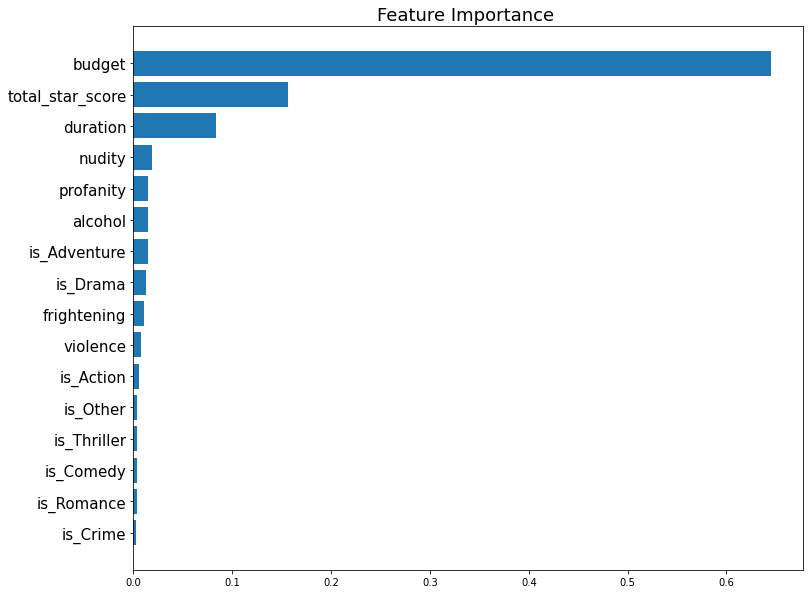

In [129]:
feature_importance = forest_gridcv.best_estimator_.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos = np.arange(len(sorted_importance))
plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, X_train.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

# JOBLIB

In [130]:
import joblib

joblib.dump(forest_best, 'imdb_joblib')

['imdb_joblib']

In [131]:
imdb_joblib = joblib.load('imdb_joblib')

# Bar Chart Race

In [134]:
pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [135]:
import bar_chart_race as bcr

genre = pd.read_csv('https://raw.githubusercontent.com/willyrizkiyan/eda-and-imdb-rating-prediction/main/imdb_genre.csv', sep=';')
genre.set_index('year', inplace = True)

bcr.bar_chart_race(df=genre,filename=None,title= "Movie Genre")